# YOLOv8 demo - custom model

In [33]:
# Import YOLOv8
from ultralytics import YOLO

# Import image visualization
import cv2

## Fresh model from few data
Here we will use YOLOv8 with no pretraining and train on our very very small dataset. Can workout well for our extremly simple example, but in practice big high quality dataset will be needed to get good results.

Best for highly specialised visual tasks where transfer learning will not help, eg. medical images.

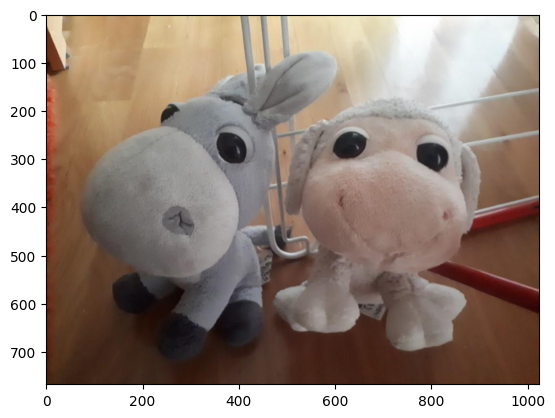

In [34]:
# Show one image from dataset
%matplotlib inline
from matplotlib import pyplot as plt
img = cv2.imread("./datasets/2plysaci/train/images/20181209_093257_jpg.rf.9e5de39c501d75369ffa14627baaa318.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [35]:
# Load empty model
model = YOLO('yolov8n.yaml')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                


  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None

In [36]:
# Train the model
train = model.train(data='./datasets/2plysaci.yaml', epochs=2000, patience=0, imgsz=1024)

# 2000 epochs completed in 0.516 hours on NVIDIA T4 + 4 CPU node

Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 14931MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=./datasets/2plysaci.yaml, epochs=2000, patience=0, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opt

In [7]:
# Find folder with latest run of training
import os

files = os.listdir("runs/detect/")
max_number = 0
latest_run = ""
for file in files:
    if "train" in file:
        if file.split("train")[1]:
            number = int(file.split("train")[1])
            max_number = max(max_number, number)
if max_number == 0:
    latest_run = "runs/detect/train"
else:
    latest_run = "runs/detect/train" + str(max_number)
print(latest_run)

runs/detect/train3



image 1/1 /home/tomas/keep-long-story-long/long_introductions/computer_vision/yolo/datasets/2plysaci/test/20181209_092837.jpg: 768x1024 1 donkey, 1 sheep, 42.1ms
Speed: 1.9ms preprocess, 42.1ms inference, 1.9ms postprocess per image at shape (1, 3, 768, 1024)


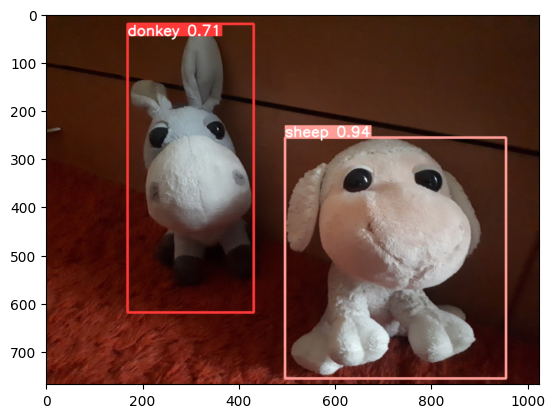

In [8]:
# Test sample 1
best_model = YOLO(f"{latest_run}/weights/best.pt")
results = best_model("./datasets/2plysaci/test/20181209_092837.jpg") 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))


image 1/1 /home/tomas/keep-long-story-long/long_introductions/computer_vision/yolo/datasets/prasatko/test/20230622_082741_jpg.rf.bd538043dbabadd6ba916d54f6946699.jpg: 608x1024 2 donkeys, 1 sheep, 42.8ms
Speed: 3.4ms preprocess, 42.8ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 1024)


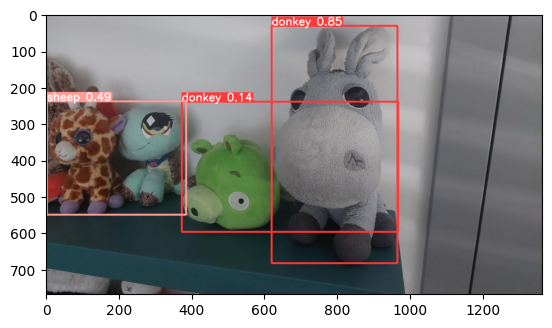

In [9]:
# Picture with pig also
results = best_model("./datasets/prasatko/test/20230622_082741_jpg.rf.bd538043dbabadd6ba916d54f6946699.jpg", conf=0.1) 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))

In [10]:
# Store this model
import shutil
shutil.copy(f"{latest_run}/weights/best.pt", "2plysaci_custom_n.pt")

'2plysaci_custom_n.pt'

## Transfer learning on new data
Suppose we have new data, new toy - pig. Let's leverage model weights we trained in previous step to cheaply train new model for pigs.

Note it is classic transfer learning so model will recognize ONLY new data so we might need to use both original and new model for full task in our application.

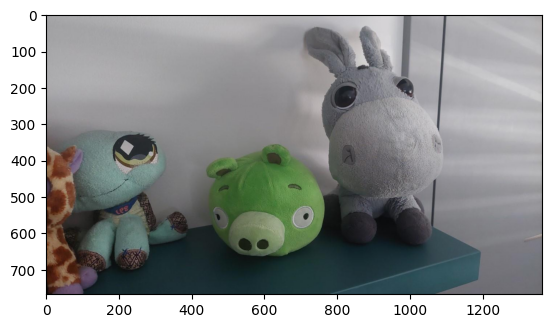

In [11]:
# Show one image from dataset
%matplotlib inline
from matplotlib import pyplot as plt
img = cv2.imread("./datasets/prasatko/valid/images/20230622_082734_jpg.rf.6b2d394943c0fbd7fda1761c9af7ef74.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
# Load model_2plysaci
model = YOLO('2plysaci_custom_n.pt')

In [13]:
# Train the model
train = model.train(data='./datasets/prasatko.yaml', epochs=100, patience=0, imgsz=1024)

# 100 epochs completed in 0,024 hours on NVIDIA T4 + 4 CPU node.

Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 14931MiB)
engine/trainer: task=detect, mode=train, model=2plysaci_custom_n.pt, data=./datasets/prasatko.yaml, epochs=100, patience=0, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fal

In [31]:
# Find folder with latest run of training
import os

files = os.listdir("runs/detect/")
max_number = 0
latest_run = ""
for file in files:
    if "train" in file:
        if file.split("train")[1]:
            number = int(file.split("train")[1])
            max_number = max(max_number, number)
if max_number == 0:
    latest_run = "runs/detect/train"
else:
    latest_run = "runs/detect/train" + str(max_number)
print(latest_run)

runs/detect/train3



image 1/1 /home/tomas/keep-long-story-long/long_introductions/computer_vision/yolo/datasets/prasatko/test/20230622_082854.jpg: 608x1024 1 donkey, 1 sheep, 10.2ms
Speed: 3.0ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 1024)


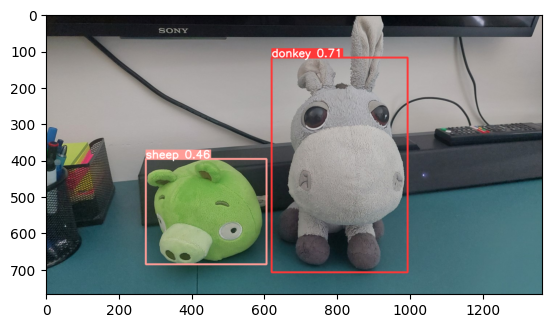

In [32]:
# Test sample 1
best_model = YOLO(f"{latest_run}/weights/best.pt")
results = best_model("./datasets/prasatko/test/20230622_082854.jpg") 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))


image 1/1 /home/tomas/keep-long-story-long/long_introductions/computer_vision/yolo/datasets/prasatko/test/20230622_082741_jpg.rf.bd538043dbabadd6ba916d54f6946699.jpg: 608x1024 1 donkey, 1 sheep, 9.8ms
Speed: 2.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 1024)


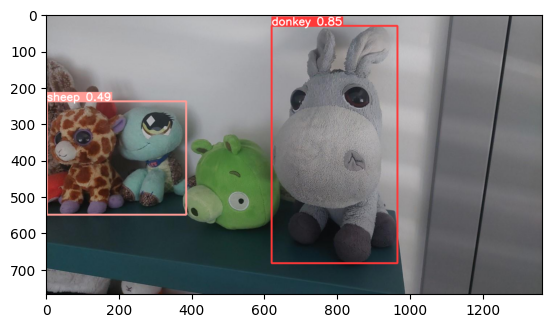

In [16]:
# Test sample 2
best_model = YOLO(f"{latest_run}/weights/best.pt")
results = best_model("./datasets/prasatko/test/20230622_082741_jpg.rf.bd538043dbabadd6ba916d54f6946699.jpg") 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))

In [17]:
# Store this model
import shutil
shutil.copy(f"{latest_run}/weights/best.pt", "transfer_new_data_only.pt")

'transfer_new_data_only.pt'

# Start with current weights but train on all old and new data
In this example we will get previous weights as starting point to save on epochs, but will train model on all data.

With that we will get universtal 3-class model, but training will take longer (not too much as our dataset is so small, but if base one is really large, it will take a while).

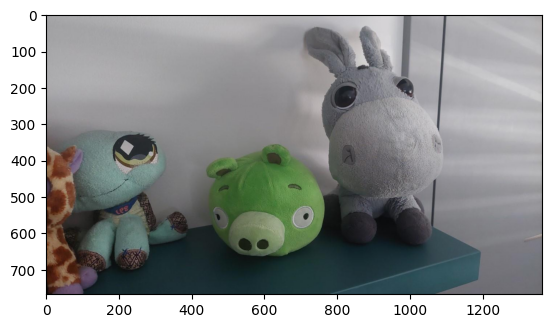

In [18]:
# Show one image from dataset
%matplotlib inline
from matplotlib import pyplot as plt
img = cv2.imread("./datasets/3plysaci/valid/images/20230622_082734_jpg.rf.1af610fda260216c44f580f731d99b5b.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [19]:
# Load model_2plysaci
model = YOLO('2plysaci_custom_n.pt')

In [20]:
# Train the model
train = model.train(data='./datasets/3plysaci.yaml', epochs=100, patience=0, imgsz=1024)

# 100 epochs completed in 0.032 hours on NVIDIA T4 + 4 CPU nod

Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 14931MiB)
engine/trainer: task=detect, mode=train, model=2plysaci_custom_n.pt, data=./datasets/3plysaci.yaml, epochs=100, patience=0, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fal

In [21]:
# Find folder with latest run of training
import os

files = os.listdir("runs/detect/")
max_number = 0
latest_run = ""
for file in files:
    if "train" in file:
        if file.split("train")[1]:
            number = int(file.split("train")[1])
            max_number = max(max_number, number)
if max_number == 0:
    latest_run = "runs/detect/train"
else:
    latest_run = "runs/detect/train" + str(max_number)
print(latest_run)

runs/detect/train4



image 1/1 /home/tomas/keep-long-story-long/long_introductions/computer_vision/yolo/datasets/prasatko/test/20230622_082854.jpg: 608x1024 2 donkeys, 1 pig, 22.2ms
Speed: 3.1ms preprocess, 22.2ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 1024)


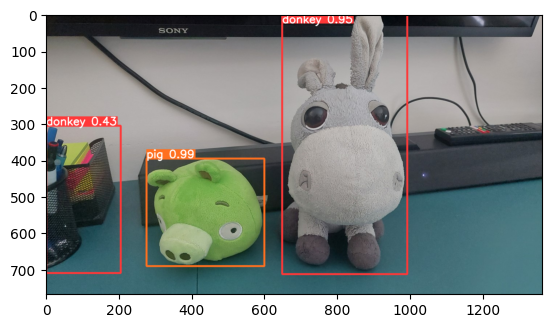

In [22]:
# Test sample 1
best_model = YOLO(f"{latest_run}/weights/best.pt")
results = best_model("./datasets/prasatko/test/20230622_082854.jpg") 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))


image 1/1 /home/tomas/keep-long-story-long/long_introductions/computer_vision/yolo/datasets/prasatko/test/20230622_082741_jpg.rf.bd538043dbabadd6ba916d54f6946699.jpg: 608x1024 1 donkey, 1 pig, 9.8ms
Speed: 2.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 1024)


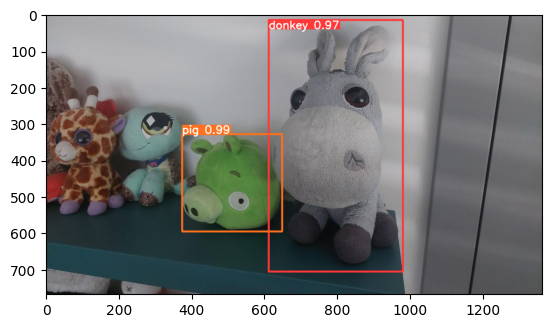

In [23]:
# Test sample 2
best_model = YOLO(f"{latest_run}/weights/best.pt")
results = best_model("./datasets/prasatko/test/20230622_082741_jpg.rf.bd538043dbabadd6ba916d54f6946699.jpg") 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))

In [24]:
# Store this model
import shutil
shutil.copy(f"{latest_run}/weights/best.pt", "transfer_all_data.pt")

'transfer_all_data.pt'

# Retrain full model with all data
Now let's compare time needed to retrain model from scratch using all data and compare model performance.

In [25]:
# Load empty model
model = YOLO('yolov8n.yaml')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               


  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

In [26]:
# Train the model
train = model.train(data='./datasets/3plysaci.yaml', epochs=2000, patience=0, imgsz=1024)

# 2000 epochs completed in 0.594 hours on NVIDIA T4 + 4 CPU node

Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 14931MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=./datasets/3plysaci.yaml, epochs=2000, patience=0, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opt

In [27]:
# Find folder with latest run of training
import os

files = os.listdir("runs/detect/")
max_number = 0
latest_run = ""
for file in files:
    if "train" in file:
        if file.split("train")[1]:
            number = int(file.split("train")[1])
            max_number = max(max_number, number)
if max_number == 0:
    latest_run = "runs/detect/train"
else:
    latest_run = "runs/detect/train" + str(max_number)
print(latest_run)

runs/detect/train5



image 1/1 /home/tomas/keep-long-story-long/long_introductions/computer_vision/yolo/datasets/prasatko/test/20230622_082854.jpg: 608x1024 2 donkeys, 1 pig, 9.8ms
Speed: 2.8ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 1024)


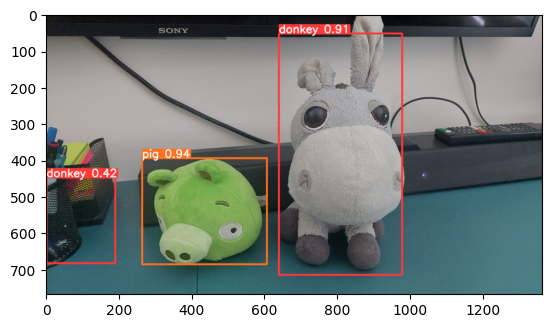

In [28]:
# Test sample 1
best_model = YOLO(f"{latest_run}/weights/best.pt")
results = best_model("./datasets/prasatko/test/20230622_082854.jpg") 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))


image 1/1 /home/tomas/keep-long-story-long/long_introductions/computer_vision/yolo/datasets/prasatko/test/20230622_082741_jpg.rf.bd538043dbabadd6ba916d54f6946699.jpg: 608x1024 1 donkey, 1 pig, 9.8ms
Speed: 2.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 1024)


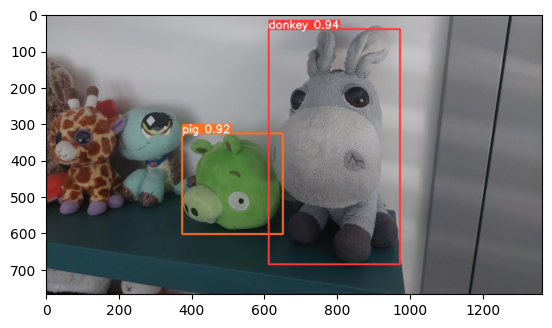

In [29]:
# Test sample 2
best_model = YOLO(f"{latest_run}/weights/best.pt")
results = best_model("./datasets/prasatko/test/20230622_082741_jpg.rf.bd538043dbabadd6ba916d54f6946699.jpg") 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))

In [30]:
# Store this model
import shutil
shutil.copy(f"{latest_run}/weights/best.pt", "3plysaci_custom_n.pt")

'3plysaci_custom_n.pt'